<a href="https://colab.research.google.com/github/SAIFIANS/DS_Code/blob/main/Named_Entity_Recognition_%26_Emotion_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Named Entity Recognition

Named Entity Recognition (NER) sometimes referred to as entity chunking, extraction, or identification is the **task of identifying and categorizing key information** (entities) in text.

A named entity is a 'real-world object' that's assigned a name- for example, a person, a country, a product or a book title.

NER is a form of natural language processing (NLP), a subfield of artificial intelligence NLP is concerned with computers processing and analysing natural language, i.e., any language that has developed naturally, rather than artificially, such as with computer coding languages.


Named Entity Recognition (NER) is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person, names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

Most Research on NER systems has been structured as taking an unnotated block of text such as this one:
"Jim bought 300 shares of Acme Corp. in 2006"

and producing an unnotated block of text that highlights the names of entities:

[Jim] **Person** bought 300 shares of [Acme Corp.] **Organization** in [2006] **time**

##What business questions can be answered ?

NER is used in many fields in Natural Laguage Processing (NLP), and it can help answering many real-world questions, such as :
* Which companies were mentioned in the news article?
* Were specified products mentioned in complaints or reviews?
* Does the tweet contain the name of a person? DOes the tweet contain this person's location ?


Try it out :
https://corenlp.run/
https://spacy.io/

##Process flow of NER

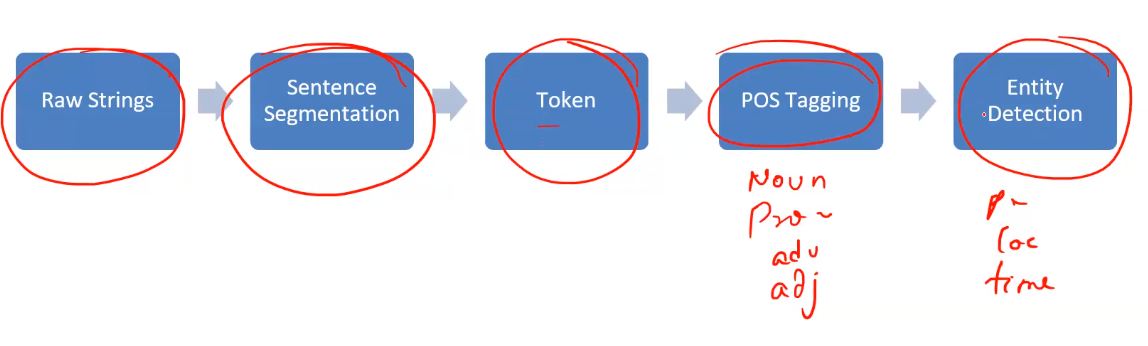

###Data Pre-processing

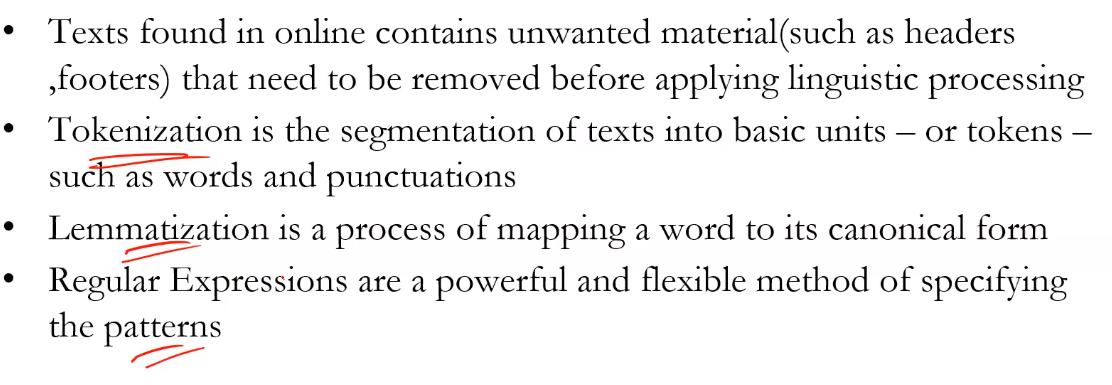

###Tokens

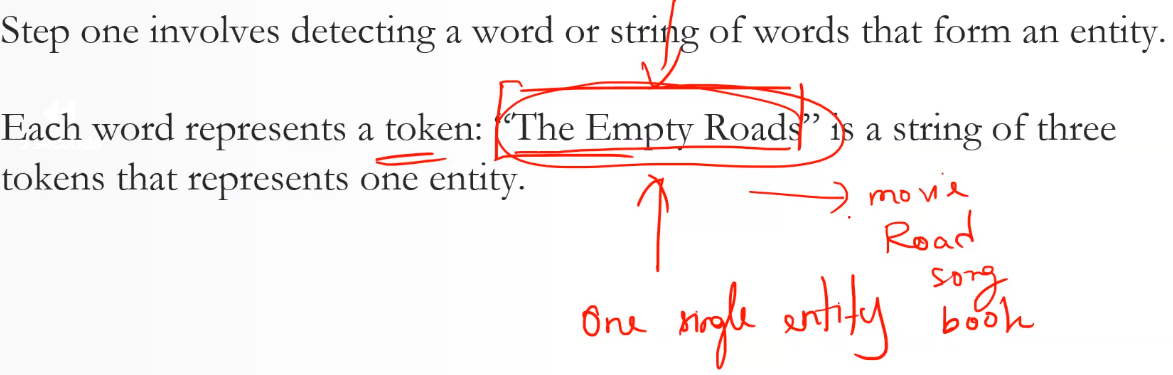

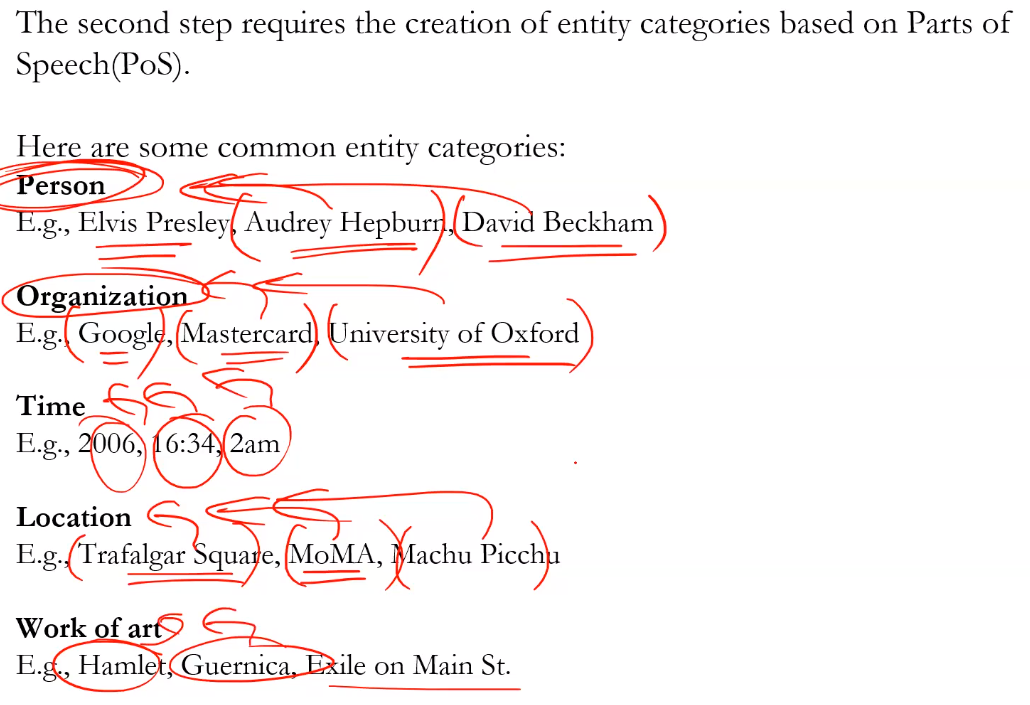

###POS Tagging

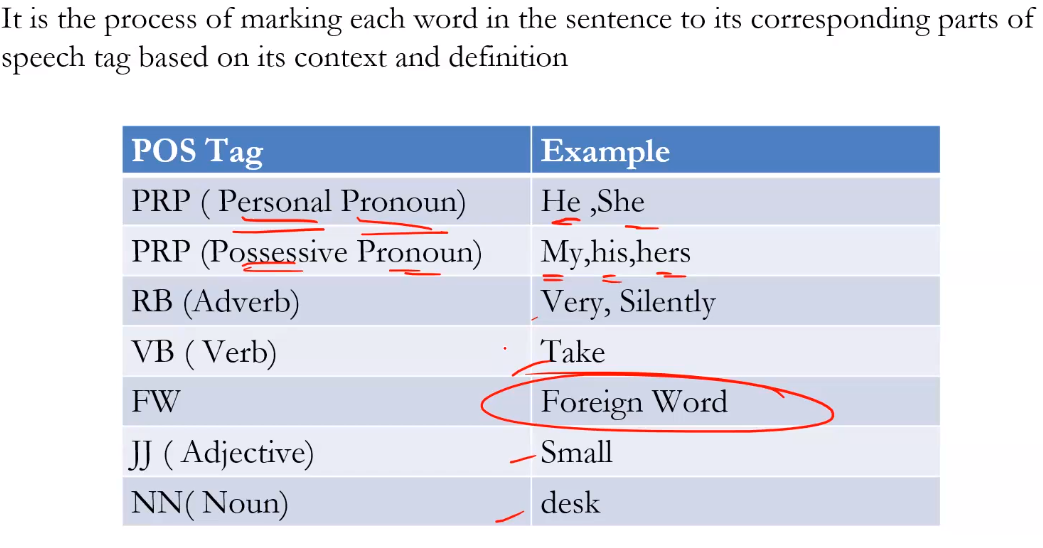

###Spacy for NER

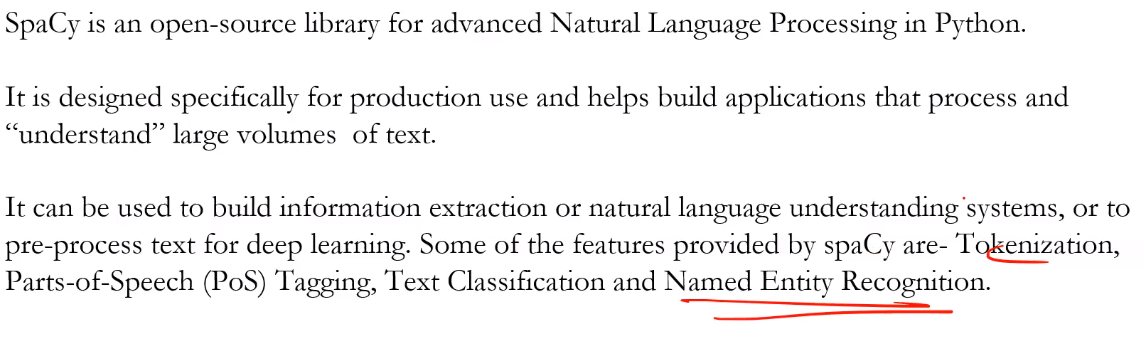

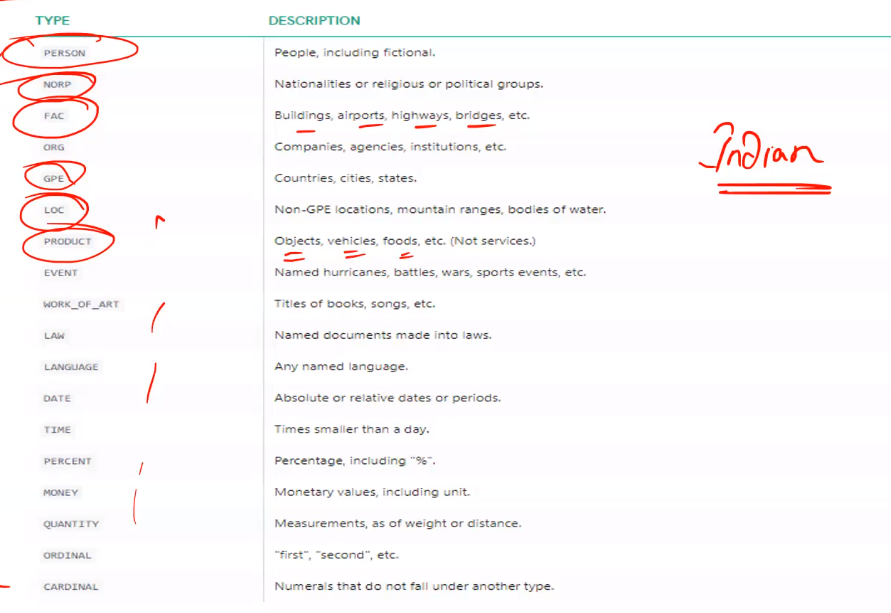

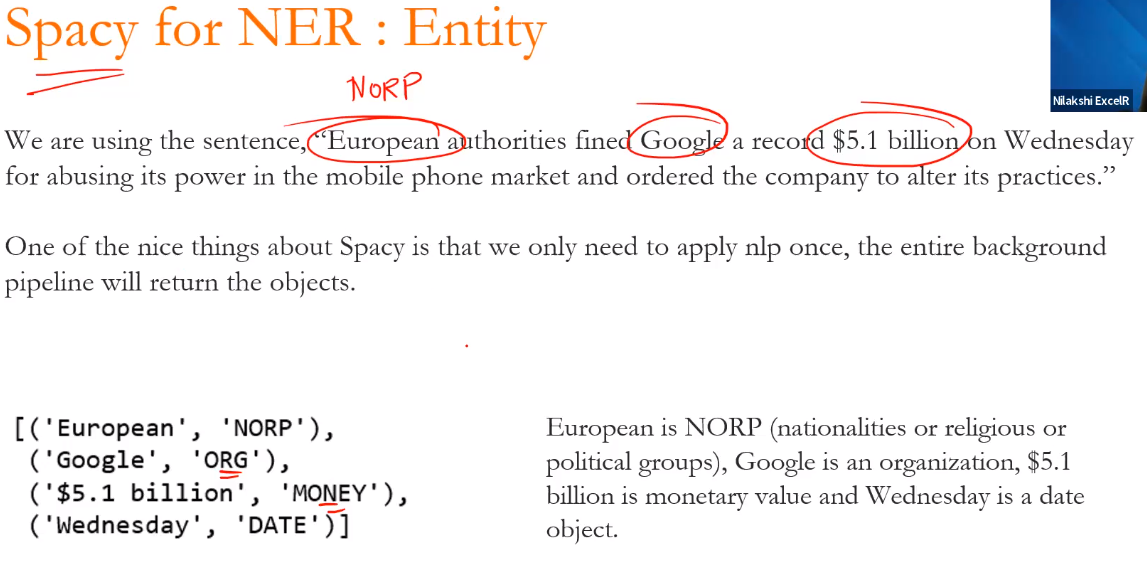

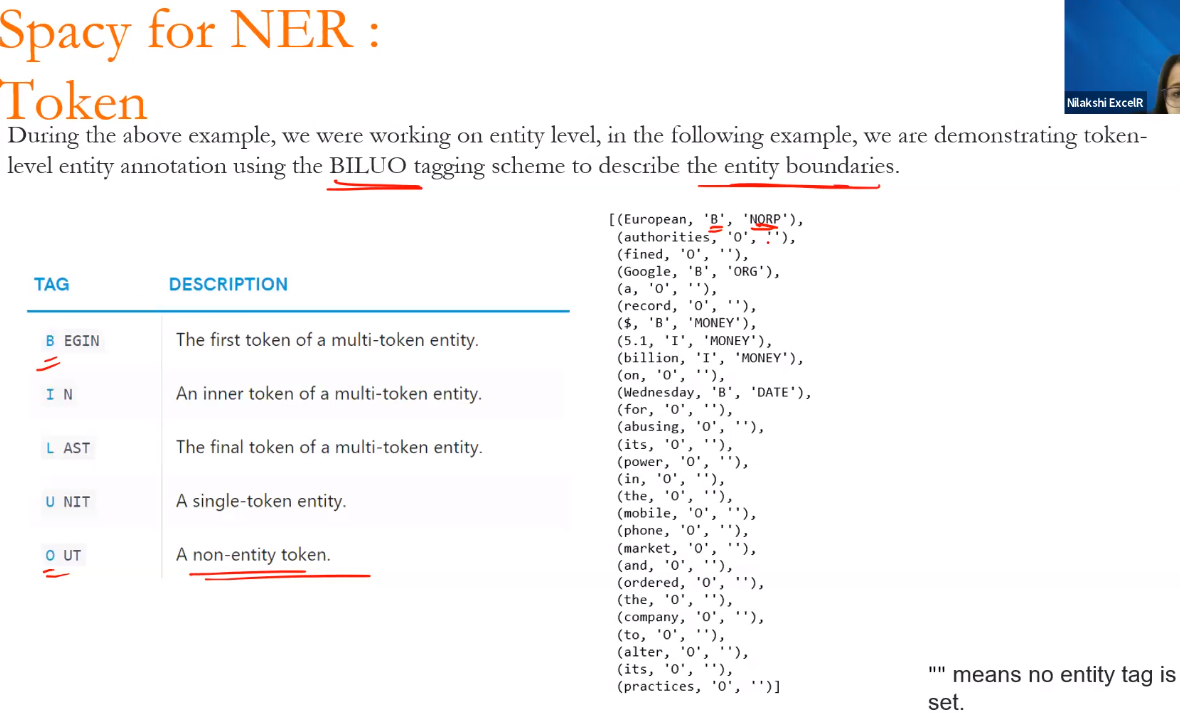

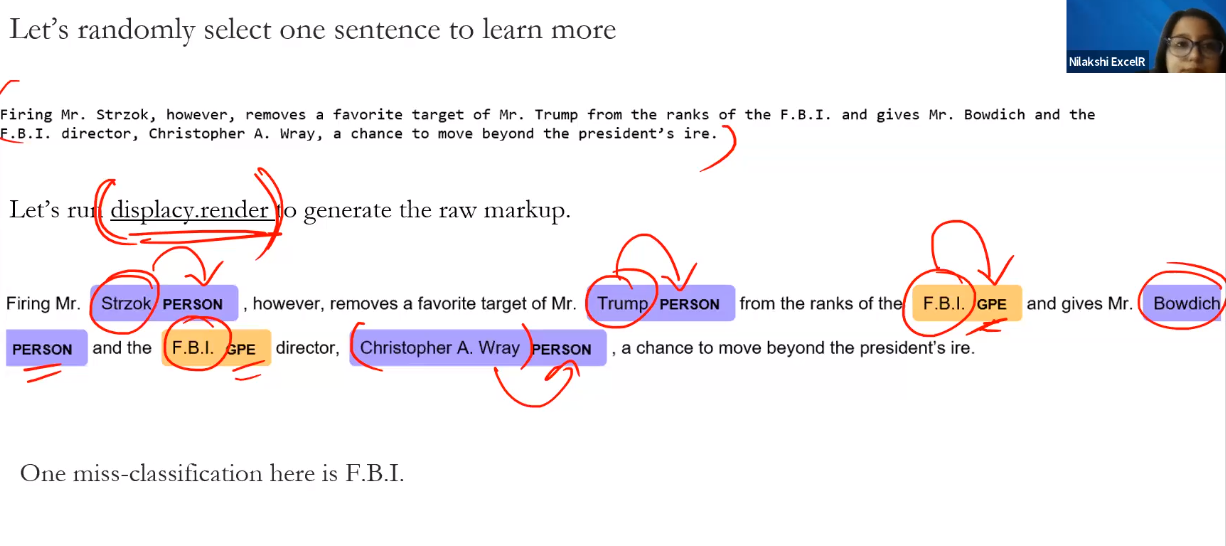

##Emotion Mining

**What is Sentiment Analysis**
* It refers to analysing an opinion or feelings about something using data like text or images regarding almost everything.
* It is the process of classifying the tet as positive, negative and neutral.

**Why Sentiment Analysis:**
* Machines can read much faster than humans and in many languages too
* We can train the machine to understand in structured manner whereas humans are subjective.

##Applications of Sentiment Analysis

* We can monitor brand sentiment online in real time.
* Quickly detect negative tweets that mention your brand or any speicific product
* Understand the what customer needs, and make data based decision on the go

##Emotional Lexicons (Dictionary)

* The first step in emotion mining is detecting the keywords or phrases that associate with emotions and it can be achieved by using parts_of_speech tagging for (Noun, adjective, adverb etc.)
* A list of emotions and words that express each emotion is called emotional lexicon
* Delightful and yummy indicates emotion of joy, gloomy and cry indicates the emotion of sadness.
* WOrds may evoke different emotions in different context, and emotion evoked by  a sentence will be sum of of emotions conveyed by words in it.
* Affin, Vader, Textblob, NRC are some of the popular Lexicons.

##Lexicon

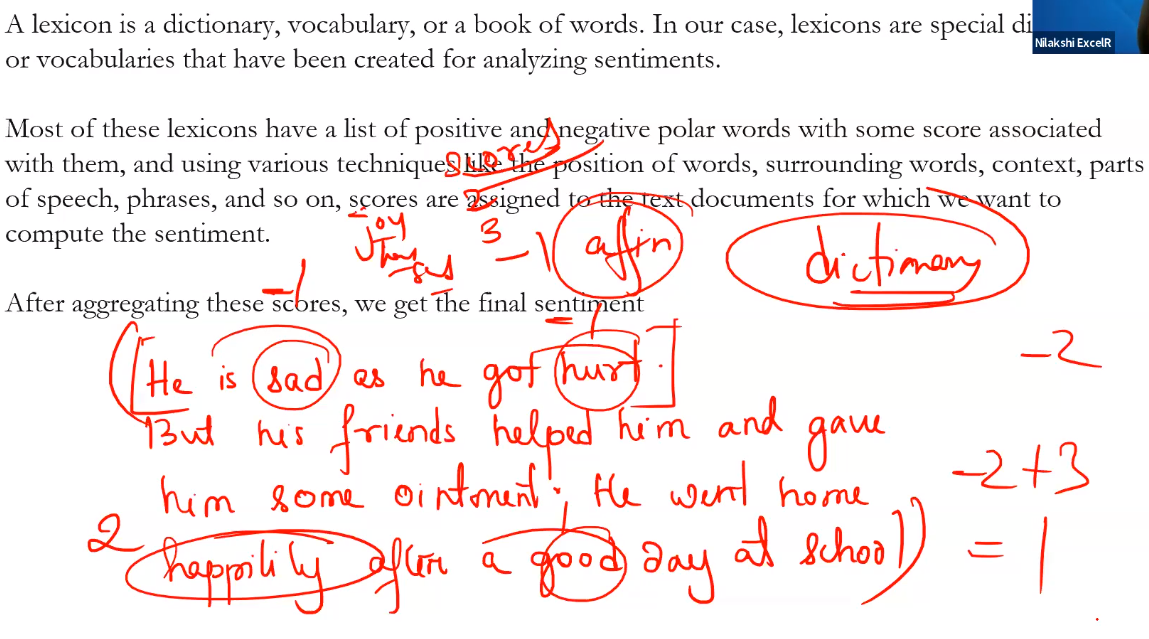

#Code

##Named Entity Recognition

In [ ]:
!pip install spacy
!pip install wordcloud

In [ ]:
#Execute below command through anaconda command prompt
!python -m spacy download en

2023-10-14 08:31:53.585807: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-14 08:31:54.699933: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (eg. pd.read_csv)
import string #special operations on string
import spacy #language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
book = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt", error_bad_lines =False)

<ipython-input-4-110bdf6e6e7b>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt", error_bad_lines =False)
Skipping line 6: expected 1 fields, saw 14



In [ ]:
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [ ]:
book = [x.strip() for x in book.x] #remove both leading and trailing characters
book = [x for x in book if x] #removes empty strings, because they are considered in python as false
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [ ]:
#Entity Tagging
nlp = spacy.load('en_core_web_sm')

one_block = ' is holiday'
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [ ]:
one_block

' is holiday'

In [ ]:
for token in doc_block:
  print(token.pos_)

SPACE
AUX
NOUN


##Emotion Mining

In [ ]:
#Sentiment Analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
import pandas
book = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt", error_bad_lines =False)
book = [x.strip() for x in book.x] #remove both leading and trailing characters
book = [x for x in book if x] #removes empty strings, because they are considered in python as false

<ipython-input-12-7fea7c054afc>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt", error_bad_lines =False)
Skipping line 6: expected 1 fields, saw 14



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(book))
sentences[5:15]

['!',
 '), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Ove

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['Sentence'])
sent_df

,Sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
183,You can get one of the best movie experiences ...
184,Overall I would it a 4.5/5.
185,"I got a great deal on this laptop, which I hav..."
186,I got it not only on discount but also was abl...


In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
#custom function: score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text:str = None):
  sent_score =0
  if text :
    sentence = nlp(text)
    print(sentence)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_,0)
  return sent_score

In [ ]:
#test that it works
calculate_sentiment(text = 'hate')

hate


-3

In [ ]:
sent_df['sentiment_value'] = sent_df['Sentence'].apply(calculate_sentiment)

It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.
Got it in 50k in Diwali sale.
Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.
Terrific sense of possession & pride.Bad News.
Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !
!
), all printers are not compatible (e.g.
the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by workin

In [ ]:
sent_df

,Sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
183,You can get one of the best movie experiences ...,3
184,Overall I would it a 4.5/5.,0
185,"I got a great deal on this laptop, which I hav...",3
186,I got it not only on discount but also was abl...,0


In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10)

,Sentence,sentiment_value
111,"The build is super strong, the operating syste...",5
46,Now my mac is perfectly fine : Got the Apple M...,5
47,Ships with macOS sierra but update is availabl...,6
65,I hope this comment can help to save somebody’...,6
104,The switch was inspired by the awesome reviews...,6
60,I use this for music production and it works a...,7
179,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,7
0,It's amazing..... battery last around 10 -12 h...,7
152,..So now I m working with the external keyboar...,17
87,"All are Gud.. For now.. Apple,apple,apple, tha...",24


In [ ]:
#Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    188.000000
mean       0.930851
std        3.379793
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [ ]:
#Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,Sentence,sentiment_value
1,Got it in 50k in Diwali sale.,0
4,Problems will be there if you are switching fr...,-11
5,!,0
6,"), all printers are not compatible (e.g.",0
8,you need to spend extra for an external CD wri...,0


In [ ]:
sent_df[sent_df['sentiment_value']>10].head()['Sentence'].tolist()[0]

'All are Gud.. For now.. Apple,apple,apple, thats the first thing that must have flashed in you mind when you saw this product, so here i have a total breif review on the laptop...***Pros***4k Video Editing with Final Cut Pro X on this thing works like butter, there is heating issue that i am going to go to apple service center to get it checkedEveryday works like checking mail and is just gr8The Battery is just OVERPOWERED, works for around 11-12 hours on continuous work and 8-9 hours when editingThe graphics card scores 30 fps in cinebench which is not that badThe performance is also fine, 280 cb processor score on cinebenchSpeakers are really good with perfect bassDisplay brightness is 300 nits, which is fineThe Wi-Fi is extremely good, can get a network even from the living room while the router is in the bedroomVery thin and lightweightMacOS is good for School work if you know all the office applications for mac, for eg.Pages is WordMagSafe 2 is the best partGood Trackpad and Keyb

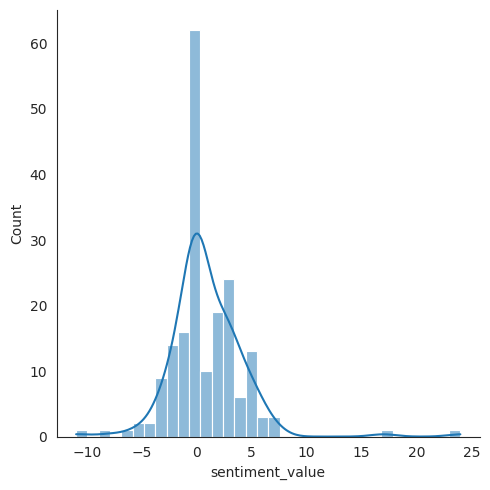

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')
sns.displot(data=sent_df, x='sentiment_value', kde = True)
plt.show()

In [ ]:
sent_df.iloc[:,:0]

""
0
1
2
3
4
...
183
184
185
186


TypeError: ignored

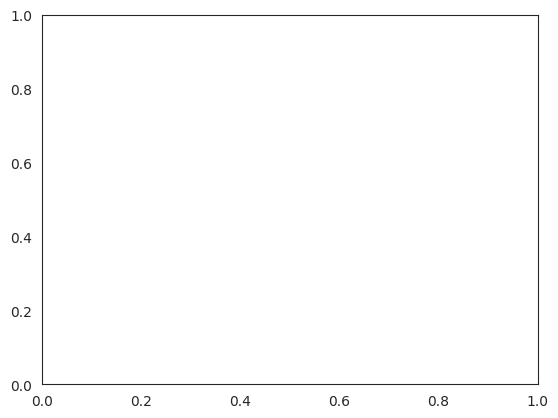

In [ ]:
sns.scatterplot(y='sentiment_value', x='index', data=sent_df)

In [ ]:
sns.lineplot(y='sentiment_value', x='index', data=sent_df)

ValueError: ignored

In [ ]:
#Data science -
#Weekday-Nilakshi-
#Hyderabad-11th August 2023-
#12:00 PM to 02:00 PM -
#NER, naive Bayes
#01:25:25